In [221]:
import pandas as pd
import os
import numpy as np
import sklearn
import seaborn as sns

from IPython import display


# Plot pretty:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures:
#figures_path = "/Users/thommasbiener/Desktop/MAT-ØK.KU/Speciale/Speciale_dokument/figures"
#IMAGES_PATH = os.path.join(figures_path, "images")
#os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=100):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
##### save_fig("*name of plot*")     ## How to save

import pickle
from sklearn.linear_model import LinearRegression

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

In [545]:
housing_analysis = pd.read_csv("test_market.csv")


#training = np.loadtxt("train_set.txt")
#testing = np.loadtxt("test_set.txt")

#housing_analysis = np.concatenate([training, testing])
#with open("features.txt", "rb") as fp:   # Unpickling
#    feature_names = pickle.load(fp)

#housing_analysis = pd.DataFrame(housing_analysis,
#                               columns = feature_names)

In [546]:
estimates_val = np.loadtxt("ES_estimations.txt")

In [547]:
housing_analysis.shape

(6048, 61)

In [549]:
housing_analysis.columns

Index(['Bygning, Samlet areal', 'soccerfield_h', 'numberOfBaths_bd',
       'breakInStatistic', 'propertyCharges', 'unemploymentRateCPH_s',
       'priceIndex_s', 'forest_h', 'numberOfFloors_b', 'metro_h',
       'publicbath_h', 'sportshall_h', 'train_h', 'mortgageRate_s',
       'busstop_h', 'OMXC20_s', 'school_h', 'supermarket_h', 'coast_h',
       'pharmacy_h', 'floor_b', 'junction_h', 'roadtrain_h', 'hospital_h',
       'daycare_h', 'turnoutVote_d', 'salesYear_b', 'airport_h',
       'areaResidential_b', 'lake_h', 'doctor_h', 'library_h',
       'radonRiskCategory_d', 'priceChangeMPriorIndex_s', 'alfs_buildYear_d',
       'unemploymentRateDK_s', 'strain_h', 'alfs_area', 'areaBasement',
       'numberOfRooms', 'aboveSea_d', 'numberOfToilets_bd', 'rebuildYear_b',
       'buildYear_b', 'salesPeriod', 'salePrice_b', 'paymentCash_b',
       'AVM_pris_d', 'propertyValuation_b', 'noise_d', 'outerwall_d',
       'floodingRisk_d', 'electionArea_d', 'quarter_b', 'usage_d', 'roof_d',
       '

In [550]:
housing_analysis = housing_analysis[[
       'salePrice_b', 'paymentCash_b', 'AVM_pris_d', 'propertyValuation_b',
       'soccerfield_h', 'numberOfBaths_bd', 'breakInStatistic',
       'propertyCharges', 'unemploymentRateCPH_s', 'priceIndex_s', 'forest_h',
       'numberOfFloors_b', 'metro_h', 'publicbath_h', 'sportshall_h',
       'train_h', 'mortgageRate_s', 'busstop_h', 'OMXC20_s', 'school_h',
       'supermarket_h', 'coast_h', 'pharmacy_h', 'floor_b', 'junction_h',
       'roadtrain_h', 'hospital_h', 'daycare_h', 'turnoutVote_d',
       'salesYear_b', 'airport_h', 'areaResidential_b', 'lake_h', 'doctor_h',
       'library_h', 'radonRiskCategory_d', 'priceChangeMPriorIndex_s',
       'alfs_buildYear_d', 'unemploymentRateDK_s', 'strain_h', 'alfs_area',
       'areaBasement', 'numberOfRooms', 'aboveSea_d',
       'numberOfToilets_bd', 'rebuildYear_b', 'buildYear_b', 'salesPeriod',
       'noise_d', 'outerwall_d', 'floodingRisk_d', 'electionArea_d',
       'quarter_b', 'usage_d', 'roof_d', 'postalId_b', 'radonRisk_d',
       'energyMark_b', 'biggestParty_d', 'itemTypeName_b']]

In [551]:
housing_analysis

,salePrice_b,paymentCash_b,AVM_pris_d,propertyValuation_b,soccerfield_h,numberOfBaths_bd,breakInStatistic,propertyCharges,unemploymentRateCPH_s,priceIndex_s,...,floodingRisk_d,electionArea_d,quarter_b,usage_d,roof_d,postalId_b,radonRisk_d,energyMark_b,biggestParty_d,itemTypeName_b
0,1995000.0,1995000.0,2318368.0,1050000.0,966.27,1.0,1.6,2.369,3.8,120.132325,...,b Possible risk,9. Midt,2019Q4,Apartment housing,Tegl,2450,a Very low,d,a Enhedslisten,Ejerlejlighed
1,4360000.0,3395000.0,4088330.0,1750000.0,418.12,1.0,1.6,3.077,4.5,141.871456,...,b Possible risk,6. Nord,2021Q2,Apartment housing,Tagpap med stor hældning,2400,a Very low,c,b Socialdemokratiet,Ejerlejlighed
2,3725000.0,3895000.0,4631076.0,1750000.0,955.06,1.0,1.6,3.483,3.8,117.958412,...,b Possible risk,9. Vesterbro,2019Q3,Apartment housing,Fibercement herunder asbest,1600-1700,a Very low,d,a Enhedslisten,Ejerlejlighed
3,3645000.0,3695000.0,4237676.0,2050000.0,652.05,1.0,1.6,3.929,4.0,114.699571,...,b Possible risk,7. Nordvest,2018Q2,"townhouse, chain house, semi-detached house",Tegl,2700,c Medium,c,b Socialdemokratiet,Rækkehus
4,1650000.0,1695000.0,2589111.0,1000000.0,1156.92,1.0,1.6,2.657,4.3,100.000000,...,b Possible risk,4. Øst,2016Q1,Apartment housing,Tegl,2300,a Very low,d,b Socialdemokratiet,Ejerlejlighed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6043,2475000.0,2495000.0,3211504.0,1100000.0,591.79,1.0,1.6,2.067,4.3,105.009452,...,b Possible risk,1. Vest,2016Q2,Apartment housing,Tegl,2100,a Very low,d,b Socialdemokratiet,Ejerlejlighed
6044,2610000.0,2795000.0,3207740.0,1250000.0,855.90,1.0,1.6,1.913,3.8,118.525520,...,b Possible risk,5. Øst,2019Q2,Apartment housing,Tegl,2200,a Very low,d,a Enhedslisten,Ejerlejlighed
6045,8450000.0,8795000.0,8992502.0,4300000.0,855.88,2.0,1.6,9.466,5.4,125.643777,...,b Possible risk,6. Øst,2020Q3,detached house,Tegl,2100,c Medium,d,b Socialdemokratiet,Villa
6046,7100000.0,7425000.0,8751716.0,3900000.0,626.34,1.0,1.3,6.335,5.3,121.266541,...,b Possible risk,"10. Kreds, Søerne",2020Q2,Apartment housing,Fibercement herunder asbest,1850-1900,a Very low,e,c Radikale,Ejerlejlighed


In [227]:
housing_analysis.describe()

,salePrice_b,paymentCash_b,AVM_pris_d,propertyValuation_b,soccerfield_h,numberOfBaths_bd,breakInStatistic,propertyCharges,unemploymentRateCPH_s,priceIndex_s,...,strain_h,alfs_area,areaBasement,numberOfRooms,BuildingUnion_area,aboveSea_d,numberOfToilets_bd,rebuildYear_b,buildYear_b,salesPeriod
count,6.371000e+03,6.371000e+03,6.371000e+03,6.371000e+03,6371.000000,6371.000000,6371.000000,6371.000000,6371.000000,6371.000000,...,6371.000000,6371.000000,6371.000000,6371.000000,6371.000000,6371.000000,6371.000000,6371.000000,6371.000000,6371.000000
mean,3.651870e+06,3.730301e+06,4.354346e+06,1.798917e+06,1012.123527,1.068278,1.555219,3.598012,4.369189,121.940995,...,1675.666839,86.336368,5.295715,3.001099,4477.064197,7.992843,1.149270,1952.218961,1943.699419,80.407725
std,1.686624e+06,1.737823e+06,2.023238e+06,9.137372e+05,468.519446,0.301566,0.106915,12.216559,0.570326,11.686877,...,1443.268362,33.543327,19.927399,1.223462,6785.911773,5.991302,0.398002,42.731515,44.733485,93.529302
min,3.500000e+05,5.450000e+05,3.500000e+05,2.800000e+05,77.240000,0.000000,1.300000,0.000000,2.800000,98.927039,...,109.510000,0.000000,0.000000,0.000000,45.000000,-1.600000,0.000000,1200.000000,1200.000000,0.000000
25%,2.300000e+06,2.350000e+06,2.737126e+06,1.050000e+06,662.510000,1.000000,1.600000,2.506500,3.800000,114.839319,...,707.690000,59.000000,0.000000,2.000000,1062.000000,2.800000,1.000000,1926.000000,1911.000000,17.000000
50%,3.325000e+06,3.395000e+06,3.938300e+06,1.650000e+06,944.050000,1.000000,1.600000,3.221000,4.300000,119.943289,...,1089.380000,80.000000,0.000000,3.000000,2300.000000,6.900000,1.000000,1940.000000,1936.000000,48.000000
75%,4.600000e+06,4.750000e+06,5.523181e+06,2.350000e+06,1295.375000,1.000000,1.600000,4.197000,5.000000,129.613734,...,1935.980000,106.000000,0.000000,4.000000,5245.000000,11.350000,1.000000,1992.000000,1974.000000,109.000000
max,8.900000e+06,1.299500e+07,1.725336e+07,1.406000e+07,2583.200000,5.000000,1.600000,960.000000,5.600000,150.965665,...,6493.840000,282.000000,221.000000,10.000000,61437.000000,37.300000,5.000000,2021.000000,2021.000000,950.000000


In [473]:
Asking_above_sale = housing_analysis.where(housing_analysis["salePrice_b"] > housing_analysis["AVM_pris_d"])
Asking_above_sale = Asking_above_sale.dropna(axis = 0)

In [474]:
Asking_above_sale.shape

(670, 60)

In [475]:
Asking_below_sale = housing_analysis.where(housing_analysis["salePrice_b"] < housing_analysis["AVM_pris_d"])
Asking_below_sale = Asking_below_sale.dropna(axis = 0)
Asking_below_sale.shape

(5113, 60)

In [476]:
Asking_equal_sale = housing_analysis.where(housing_analysis["salePrice_b"] == housing_analysis["AVM_pris_d"])
Asking_equal_sale = Asking_equal_sale.dropna(axis = 0)
Asking_equal_sale.shape

(265, 60)

In [477]:
sale_ordered = pd.concat([Asking_above_sale, Asking_below_sale, Asking_equal_sale])

In [478]:
sale_ordered.columns

Index(['salePrice_b', 'paymentCash_b', 'AVM_pris_d', 'propertyValuation_b',
       'soccerfield_h', 'numberOfBaths_bd', 'breakInStatistic',
       'propertyCharges', 'unemploymentRateCPH_s', 'priceIndex_s', 'forest_h',
       'numberOfFloors_b', 'metro_h', 'publicbath_h', 'sportshall_h',
       'train_h', 'mortgageRate_s', 'busstop_h', 'OMXC20_s', 'school_h',
       'supermarket_h', 'coast_h', 'pharmacy_h', 'floor_b', 'junction_h',
       'roadtrain_h', 'hospital_h', 'daycare_h', 'turnoutVote_d',
       'salesYear_b', 'airport_h', 'areaResidential_b', 'lake_h', 'doctor_h',
       'library_h', 'radonRiskCategory_d', 'priceChangeMPriorIndex_s',
       'alfs_buildYear_d', 'unemploymentRateDK_s', 'strain_h', 'alfs_area',
       'areaBasement', 'numberOfRooms', 'aboveSea_d', 'numberOfToilets_bd',
       'rebuildYear_b', 'buildYear_b', 'salesPeriod', 'noise_d', 'outerwall_d',
       'floodingRisk_d', 'electionArea_d', 'quarter_b', 'usage_d', 'roof_d',
       'postalId_b', 'radonRisk_d', 'ene

In [479]:
sale_ordered_dropped = sale_ordered.drop(columns=['salePrice_b', 'AVM_pris_d', 'propertyValuation_b',
                            'soccerfield_h','breakInStatistic','propertyCharges',
                           'unemploymentRateCPH_s', 'priceIndex_s', 'forest_h',
                           'metro_h', 'publicbath_h', 'sportshall_h', 'numberOfFloors_b',
                          'train_h', 'mortgageRate_s', 'busstop_h', 'OMXC20_s', 
                           'school_h','supermarket_h', 'coast_h', 'pharmacy_h', 
                          'junction_h','roadtrain_h', 'hospital_h', 'daycare_h', 
                           'turnoutVote_d','salesYear_b', 'airport_h', 'lake_h', 'doctor_h',
                          'library_h', 'radonRiskCategory_d', 'priceChangeMPriorIndex_s',
                           'unemploymentRateDK_s', 'strain_h',  'aboveSea_d',
                          'noise_d', 'floodingRisk_d', 'electionArea_d', 
                           'radonRisk_d','biggestParty_d','energyMark_b',
                            'alfs_buildYear_d', 'buildYear_b', 'itemTypeName_b',
                             'areaResidential_b'])

In [480]:
sale_ordered_dropped

,paymentCash_b,numberOfBaths_bd,floor_b,alfs_area,areaBasement,numberOfRooms,numberOfToilets_bd,rebuildYear_b,salesPeriod,outerwall_d,quarter_b,usage_d,roof_d,postalId_b
1,3395000.0,1.0,2.0,119.0,0.0,5.0,1.0,1948.0,149.0,Andet materiale,2021Q2,Apartment housing,Tagpap med stor hældning,2400
6,3850000.0,1.0,5.0,71.0,0.0,2.0,1.0,1917.0,208.0,Mursten,2021Q3,Apartment housing,Tegl,2100
34,5395000.0,1.0,4.0,109.0,0.0,2.0,1.0,2005.0,14.0,Glas,2021Q2,Apartment housing,Glas,2300
69,2995000.0,1.0,5.0,59.0,0.0,3.0,1.0,1895.0,4.0,Mursten,2021Q2,Apartment housing,Fibercement herunder asbest,1600-1700
72,1845000.0,1.0,3.0,40.0,0.0,1.0,1.0,1974.0,13.0,Betonelementer,2021Q2,Apartment housing,Tagpap med stor hældning,2400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5952,1945000.0,1.0,0.0,43.0,0.0,2.0,1.0,1934.0,111.0,Mursten,2021Q4,Apartment housing,Fibercement herunder asbest,2300
5959,2750000.0,1.0,0.0,68.0,0.0,3.0,1.0,1937.0,40.0,Mursten,2021Q3,Apartment housing,Tagpap med stor hældning,2720
5965,2395000.0,1.0,0.0,65.0,0.0,3.0,1.0,1934.0,38.0,Mursten,2021Q4,Apartment housing,Tegl,2300
6026,3350000.0,1.0,3.0,60.0,0.0,3.0,1.0,1940.0,28.0,Mursten,2021Q3,Apartment housing,Tagpap med stor hældning,2300


In [306]:
quarters = ['2016Q1','2016Q2','2016Q3','2016Q4',
            '2017Q1','2017Q2','2017Q3','2017Q4',
            '2018Q1','2018Q2','2018Q3','2018Q4',
            '2019Q1','2019Q2','2019Q3','2019Q4',
            '2020Q1','2020Q2','2020Q3','2020Q4',
            '2021Q1','2021Q2','2021Q3','2021Q4']


In [273]:
len(n_sales)
len(median_sp)

24

In [278]:
(median_sp[l]-median_sp[0])/median_sp[l]*100

18.138801261829656

In [341]:

median_sp = []
n_sales= []
for i in quarters:
    data2 = housing_analysis[housing_analysis["quarter_b"] == i]
    median_sp.append(np.median(data2["salePrice_b"]))
    n_sales.append(data2.shape[0])

change_med=[0]
change_sales=[0]
for l in range(1,23):
    change_med.append(change_med[l-1]+ (median_sp[l]-median_sp[l-1])/median_sp[l-1])
    change_sales.append(change_sales[l-1]+(n_sales[l]-n_sales[l-1])/n_sales[l-1])

#x = [0]
#change_med = x + change_med
#change_sales = x + change_sales

In [337]:
x[0]

0

In [328]:
print(median_sp)
(median_sp[2]-median_sp[1])/median_sp[1]*100

[3015000.0, 3198000.0, 3150000.0, 3298000.0, 3325000.0, 3425500.0, 3343038.0, 3350000.0, 3427000.0, 3400000.0, 3260000.0, 3200000.0, 3400000.0, 3100000.0, 3300000.0, 3322500.0, 3400000.0, 3408750.0, 3562500.0, 3695000.0, 3700000.0, 3700000.0, 3465000.0, 3125000.0]


-1.5009380863039399

In [342]:
change_sales

[0,
 0.3551673944687045,
 0.315425181794161,
 0.17112987978073818,
 0.49008412814675123,
 0.7021753075322814,
 0.6498449722910713,
 0.5618380697889143,
 0.5949506525703712,
 0.7222400298597484,
 0.6848720363585299,
 0.6013277325610615,
 0.5893571984910799,
 0.877334831296299,
 0.9250917053918127,
 0.9112795506956801,
 0.8069378140010023,
 1.0141309336257092,
 1.3353744569417714,
 1.3304724961574577,
 1.4275168311328272,
 1.173812295883613,
 0.8886137399269343]

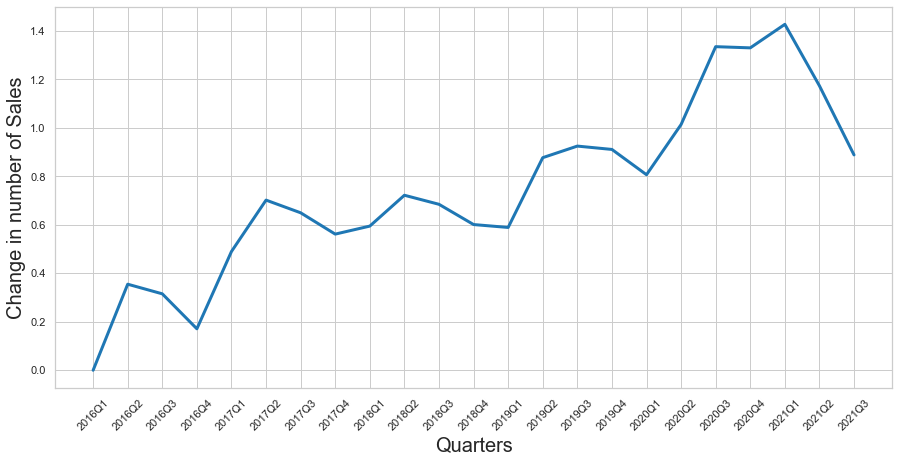

In [352]:
plt.plot(quarters[:-1], change_sales, c ="tab:blue", linewidth=3)
plt.xticks(rotation=45)
plt.ylabel('Change in number of Sales')
plt.xlabel('Quarters')
plt.savefig("chang_sales")

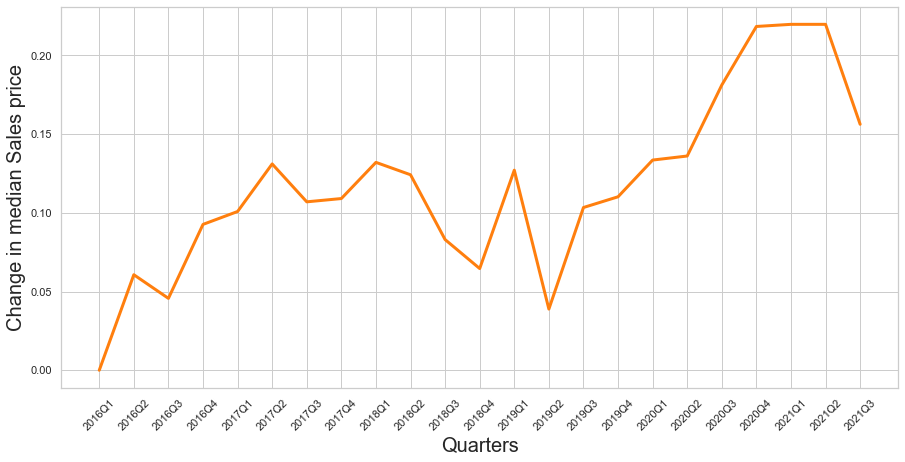

In [353]:
plt.plot(quarters[:-1], change_med, c ="tab:orange", linewidth=3)
plt.xticks(rotation=45)
plt.ylabel('Change in median Sales price')
plt.xlabel('Quarters')
plt.savefig("change_saleprice")

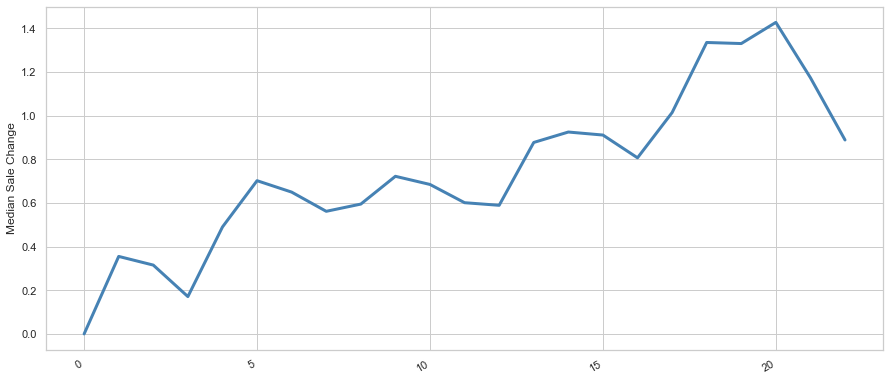

In [343]:
#m2price = cleaning.groupby('quarter_b')['squareMetrePrice_bd'].mean()

sns.set_theme(style="whitegrid")

plt.rcParams["figure.figsize"] = (15,7)
fig, ax = plt.subplots()

plt.plot(change_sales, c ='steelblue', linewidth=3)


fig.autofmt_xdate()
plt.ylabel('Median Sale Change')
#plt.legend(fontsize=15)
plt.rc('axes', labelsize=20)
xticks = ax.xaxis.get_major_ticks()
for i,tick in enumerate(xticks):
    if i%1 != 0:
        tick.label1.set_visible(False)

plt.show()

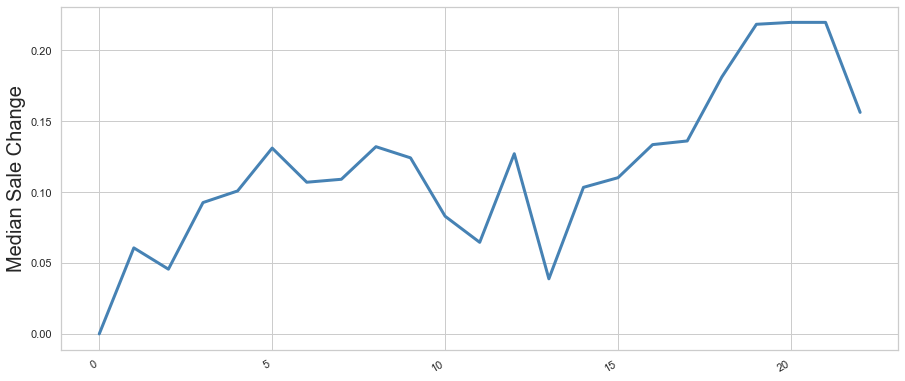

In [344]:
plt.rcParams["figure.figsize"] = (15,7)
fig, ax = plt.subplots()

plt.plot(change_med, c ='steelblue', linewidth=3)


fig.autofmt_xdate()
plt.ylabel('Median Sale Change')
#plt.legend(fontsize=15)
plt.rc('axes', labelsize=20)
xticks = ax.xaxis.get_major_ticks()
for i,tick in enumerate(xticks):
    if i%1 != 0:
        tick.label1.set_visible(False)

plt.show()

In [621]:
sale_ordered.columns
sale_table = sale_ordered[["salePrice_b", "paymentCash_b", "salesYear_b"]]
sale_table

,salePrice_b,paymentCash_b,salesYear_b
0,1995000.0,1995000.0,2019.0
1,4360000.0,3395000.0,2021.0
2,3725000.0,3895000.0,2019.0
3,3645000.0,3695000.0,2018.0
4,1650000.0,1695000.0,2016.0
...,...,...,...
6043,2475000.0,2495000.0,2016.0
6044,2610000.0,2795000.0,2019.0
6045,8450000.0,8795000.0,2020.0
6046,7100000.0,7425000.0,2020.0


In [632]:
Ratio_year = sale_table[sale_table["salesYear_b"]==2016]
ratio = Ratio_year["salePrice_b"]/Ratio_year["paymentCash_b"]
print("ratio mean", ratio.mean())
print("below", len(Ratio_year[Ratio_year["salePrice_b"] < Ratio_year["paymentCash_b"]])/Ratio_year.shape[0])
print("at", len(Ratio_year[Ratio_year["salePrice_b"] == Ratio_year["paymentCash_b"]])/Ratio_year.shape[0])
print("above", len(Ratio_year[Ratio_year["salePrice_b"] > Ratio_year["paymentCash_b"]])/Ratio_year.shape[0])
print("mean payment", Ratio_year["paymentCash_b"].mean())
print("length", Ratio_year.shape)

ratio mean 0.9822644677899774
below 0.6015748031496063
at 0.25196850393700787
above 0.14645669291338584
mean payment 3570332.5228346456
length (635, 3)


In [236]:
from scipy.stats import invgamma
import matplotlib.pyplot as plt



In [237]:
def shape_scale(mean, sd, parameter):
    if parameter:
        return (mean**2/sd**2+ 2)
    else:
        return(mean**3/sd**2 + mean)

In [238]:
shape, scale = shape_scale(1.38, 0.99)  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, Asking_above_sale.shape[0])

TypeError: shape_scale() missing 1 required positional argument: 'parameter'

In [575]:
mean, sd = 1.38, 0.99
above_sim = np.around(invgamma.rvs(shape_scale(mean, sd, True), 
                 scale = shape_scale(mean, sd, False),  
                 size = Asking_above_sale.shape[0]))
above_sim[above_sim < 1] = 1

In [576]:
mean, sd = 3.80, 3.28
below_sim = np.around(invgamma.rvs(shape_scale(mean, sd, True), 
                 scale = shape_scale(mean, sd, False),  
                 size = Asking_below_sale.shape[0]))
below_sim[below_sim < 1] = 1

In [577]:
mean, sd = 1.84, 1.31
equal_sim = np.around(invgamma.rvs(shape_scale(mean, sd, True), 
                 scale = shape_scale(mean, sd, False),  
                 size = Asking_equal_sale.shape[0]))
equal_sim[equal_sim < 1] = 1

In [578]:
all_bidders = np.concatenate([above_sim, below_sim, equal_sim])

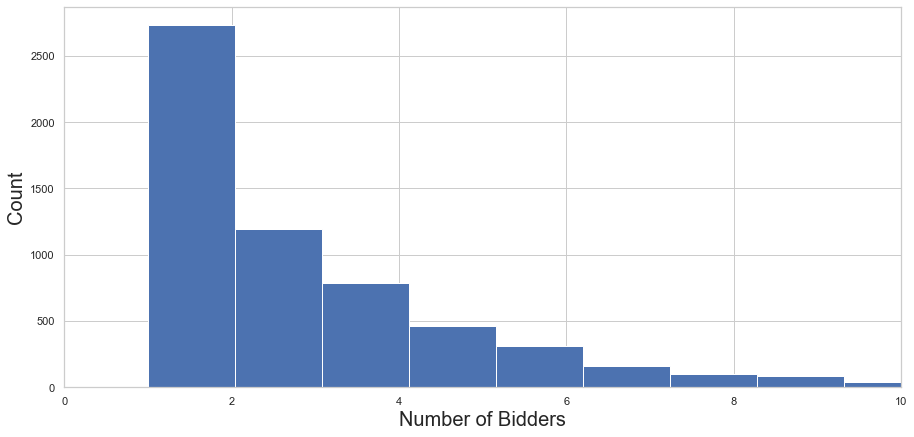

In [620]:
plt.hist(all_bidders, bins=50)
axes = plt.gca()
axes.set_xlim([0,10])
#axes.set_ylim([0,700])
plt.xlabel('Number of Bidders')
plt.ylabel('Count')
plt.savefig("bidders_sim")

In [405]:
pois_sim

array([0, 2, 1, ..., 1, 0, 0])

In [464]:
class OneHotEncodercustom(BaseEstimator, TransformerMixin):
    def __init__(self, variables):
        self.variables = variables
        self.ohe = OneHotEncoder(drop = 'first', handle_unknown = "error")
    def fit(self, X, y = None):
        X_ = X.loc[:,self.variables]
        self.ohe.fit(X_)
        return self
    def transform(self, X):
        X_ = X.loc[:,self.variables]
        X__ = X.copy()
        
        X_transformed = pd.DataFrame(self.ohe.transform(X_).toarray(),
                                    columns = self.ohe.get_feature_names_out())
        X__.drop(self.variables, axis = 1, inplace = True)
        X__[self.ohe.get_feature_names_out()] = \
            X_transformed[self.ohe.get_feature_names_out()].values
        return X__

In [465]:
sale_ordered_dropped.columns

Index(['paymentCash_b', 'numberOfBaths_bd', 'floor_b', 'alfs_area',
       'areaBasement', 'numberOfRooms', 'numberOfToilets_bd', 'rebuildYear_b',
       'salesPeriod', 'outerwall_d', 'quarter_b', 'usage_d', 'roof_d',
       'postalId_b'],
      dtype='object')

In [435]:
onehot_housing = ['postalId_b', 'usage_d', 'outerwall_d', 'roof_d', 'quarter_b']

cat_OneHotEncodercustom = OneHotEncodercustom(variables = onehot_housing)

askingPrice_reg = cat_OneHotEncodercustom.fit_transform(sale_ordered_dropped)
askingPrice_reg["paymentCash_b"] = np.log(askingPrice_reg["paymentCash_b"])
askingPrice_reg.shape

(30454, 75)

In [425]:
print(np.any(np.isnan(askingPrice_reg)))
print(np.all(np.isfinite(askingPrice_reg)))

False
True


In [426]:
pre_y = np.array(sim_ordered)
print(np.any(np.isnan(pre_y)))
print(np.all(np.isfinite(pre_y)))

False
True


In [428]:
len(pre_y)

6371

In [466]:
pre_y = np.log(np.array(all_bidders).astype(float))
pre_X = np.array(askingPrice_reg)

lin_reg = LinearRegression()
lin_reg.fit(pre_X, pre_y)

print("Predictions:",np.exp(lin_reg.predict(pre_X)))
print("Label-values:", np.exp(pre_y))
print("Absolute error:", mean_absolute_error(np.exp(pre_y), np.exp(lin_reg.predict(pre_X))))


Predictions: [3.03041155 2.82642447 1.63634328 ... 1.52448582 1.5467249  1.55111903]
Label-values: [1. 2. 1. ... 1. 1. 1.]
Absolute error: 1.6282252065235931


In [633]:
attributes = list(askingPrice_reg.columns)
sorted(zip(lin_reg.coef_, attributes))#, reverse=True)

### (-0.003436878998668308, 'paymentCash_b')

[(-0.42524805337204535, 'roof_d_Glas'),
 (-0.2904870795813307, 'outerwall_d_Træ'),
 (-0.14808918825168355, 'outerwall_d_Metal'),
 (-0.10806801021608657, 'quarter_b_2017Q3'),
 (-0.08721715640180877, 'roof_d_Levende tage'),
 (-0.08534650973991124, 'roof_d_Metal'),
 (-0.07170813269143077, 'outerwall_d_Fibercement uden asbest'),
 (-0.06942711076510326, 'roof_d_Fibercement uden asbest'),
 (-0.06648606960560624, 'quarter_b_2021Q1'),
 (-0.06328335536225412, 'roof_d_Betontagsten'),
 (-0.060607739103752514, 'roof_d_Tagpap med stor hældning'),
 (-0.059795910330780896, 'roof_d_Tagpap med lille hældning'),
 (-0.05932861140466975, 'quarter_b_2016Q3'),
 (-0.05640354611792675, 'quarter_b_2019Q2'),
 (-0.04726316272742422, 'outerwall_d_Letbetonsten'),
 (-0.04723893498423253, 'roof_d_Fibercement herunder asbest'),
 (-0.04698067874790101, 'quarter_b_2016Q4'),
 (-0.045433724060749525, 'quarter_b_2021Q2'),
 (-0.04467227045207135, 'numberOfToilets_bd'),
 (-0.036923305907489185, 'quarter_b_2021Q4'),
 (-0.033

In [553]:
estimates_val = np.loadtxt("ES_estimations.txt")
housing_analysis["ES_estimates"] = estimates_val

In [609]:
sale_ordered = housing_analysis[[
       'salePrice_b', 'paymentCash_b', 'AVM_pris_d', 'propertyValuation_b',
       'ES_estimates',
       'soccerfield_h', 'numberOfBaths_bd', 'breakInStatistic',
       'propertyCharges', 'unemploymentRateCPH_s', 'priceIndex_s', 'forest_h',
       'numberOfFloors_b', 'metro_h', 'publicbath_h', 'sportshall_h',
       'train_h', 'mortgageRate_s', 'busstop_h', 'OMXC20_s', 'school_h',
       'supermarket_h', 'coast_h', 'pharmacy_h', 'floor_b', 'junction_h',
       'roadtrain_h', 'hospital_h', 'daycare_h', 'turnoutVote_d',
       'salesYear_b', 'airport_h', 'areaResidential_b', 'lake_h', 'doctor_h',
       'library_h', 'radonRiskCategory_d', 'priceChangeMPriorIndex_s',
       'alfs_buildYear_d', 'unemploymentRateDK_s', 'strain_h', 'alfs_area',
       'areaBasement', 'numberOfRooms', 'aboveSea_d',
       'numberOfToilets_bd', 'rebuildYear_b', 'buildYear_b', 'salesPeriod',
       'noise_d', 'outerwall_d', 'floodingRisk_d', 'electionArea_d',
       'quarter_b', 'usage_d', 'roof_d', 'postalId_b', 'radonRisk_d',
       'energyMark_b', 'biggestParty_d', 'itemTypeName_b']]

In [610]:
sale_ordered_dropped = sale_ordered.drop(columns=['salePrice_b', 'paymentCash_b', 'AVM_pris_d', 
                                                  'propertyValuation_b',
                            'soccerfield_h','breakInStatistic','propertyCharges',
                           'unemploymentRateCPH_s', 'priceIndex_s', 'forest_h',
                           'metro_h', 'publicbath_h', 'sportshall_h', 'numberOfFloors_b',
                          'train_h', 'mortgageRate_s', 'busstop_h', 'OMXC20_s', 
                           'school_h','supermarket_h', 'coast_h', 'pharmacy_h', 
                          'junction_h','roadtrain_h', 'hospital_h', 'daycare_h', 
                           'turnoutVote_d','salesYear_b', 'airport_h', 'lake_h', 'doctor_h',
                          'library_h', 'radonRiskCategory_d', 'priceChangeMPriorIndex_s',
                           'unemploymentRateDK_s', 'strain_h',  'aboveSea_d',
                          'noise_d', 'floodingRisk_d', 'electionArea_d', 
                           'radonRisk_d','biggestParty_d','energyMark_b',
                            'alfs_buildYear_d', 'buildYear_b', 'itemTypeName_b',
                             'areaResidential_b'])

In [611]:
sale_ordered_dropped

,ES_estimates,numberOfBaths_bd,floor_b,alfs_area,areaBasement,numberOfRooms,numberOfToilets_bd,rebuildYear_b,salesPeriod,outerwall_d,quarter_b,usage_d,roof_d,postalId_b
0,2.039374e+06,1.0,4.0,59.0,0.0,2.0,1.0,1936.0,19.0,Mursten,2019Q4,Apartment housing,Tegl,2450
1,4.298645e+06,1.0,2.0,119.0,0.0,5.0,1.0,1948.0,149.0,Andet materiale,2021Q2,Apartment housing,Tagpap med stor hældning,2400
2,3.904390e+06,1.0,4.0,88.0,0.0,3.0,1.0,1906.0,154.0,Mursten,2019Q3,Apartment housing,Fibercement herunder asbest,1600-1700
3,3.355199e+06,1.0,0.0,89.0,89.0,4.0,1.0,1944.0,14.0,Mursten,2018Q2,"townhouse, chain house, semi-detached house",Tegl,2700
4,1.780440e+06,1.0,1.0,58.0,0.0,2.0,1.0,1932.0,60.0,Mursten,2016Q1,Apartment housing,Tegl,2300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6043,4.620978e+06,1.0,1.0,56.0,0.0,2.0,1.0,1930.0,27.0,Mursten,2016Q2,Apartment housing,Tegl,2100
6044,2.032371e+06,1.0,2.0,49.0,0.0,2.0,1.0,2000.0,177.0,Mursten,2019Q2,Apartment housing,Tegl,2200
6045,3.156778e+06,2.0,0.0,199.0,113.0,7.0,3.0,1952.0,99.0,Mursten,2020Q3,detached house,Tegl,2100
6046,2.106140e+06,1.0,3.0,165.0,0.0,5.0,1.0,1910.0,319.0,Mursten,2020Q2,Apartment housing,Fibercement herunder asbest,1850-1900


In [612]:
onehot_housing = ['postalId_b', 'usage_d', 'outerwall_d', 'roof_d', 'quarter_b']

cat_OneHotEncodercustom = OneHotEncodercustom(variables = onehot_housing)

askingPrice_reg = cat_OneHotEncodercustom.fit_transform(sale_ordered_dropped)
askingPrice_reg['ES_estimates'] = np.log(askingPrice_reg['ES_estimates'])
askingPrice_reg.shape

pre_y = np.log(np.array(all_bidders).astype(float))
pre_X = np.array(askingPrice_reg)

lin_reg = LinearRegression()
lin_reg.fit(pre_X, pre_y)

print("Predictions:",np.exp(lin_reg.predict(pre_X)))
print("Label-values:", np.exp(pre_y))
print("Absolute error:", mean_absolute_error(np.exp(pre_y), np.exp(lin_reg.predict(pre_X))))


Predictions: [2.86404261 2.6020233  2.77047688 ... 2.67544955 2.90755229 2.88027203]
Label-values: [2. 1. 1. ... 1. 1. 1.]
Absolute error: 1.7427569760950452


In [613]:
attributes = list(askingPrice_reg.columns)
sorted(zip(lin_reg.coef_, attributes))#, reverse=True)


[(-0.42524805337204535, 'roof_d_Glas'),
 (-0.2904870795813307, 'outerwall_d_Træ'),
 (-0.14808918825168355, 'outerwall_d_Metal'),
 (-0.10806801021608657, 'quarter_b_2017Q3'),
 (-0.08721715640180877, 'roof_d_Levende tage'),
 (-0.08534650973991124, 'roof_d_Metal'),
 (-0.07170813269143077, 'outerwall_d_Fibercement uden asbest'),
 (-0.06942711076510326, 'roof_d_Fibercement uden asbest'),
 (-0.06648606960560624, 'quarter_b_2021Q1'),
 (-0.06328335536225412, 'roof_d_Betontagsten'),
 (-0.060607739103752514, 'roof_d_Tagpap med stor hældning'),
 (-0.059795910330780896, 'roof_d_Tagpap med lille hældning'),
 (-0.05932861140466975, 'quarter_b_2016Q3'),
 (-0.05640354611792675, 'quarter_b_2019Q2'),
 (-0.04726316272742422, 'outerwall_d_Letbetonsten'),
 (-0.04723893498423253, 'roof_d_Fibercement herunder asbest'),
 (-0.04698067874790101, 'quarter_b_2016Q4'),
 (-0.045433724060749525, 'quarter_b_2021Q2'),
 (-0.04467227045207135, 'numberOfToilets_bd'),
 (-0.036923305907489185, 'quarter_b_2021Q4'),
 (-0.033

In [614]:
import statsmodels.api as sm
X1 = sm.add_constant(pre_X)
model = sm.OLS(pre_y, X1)
model = model.fit()


attributes = list(askingPrice_reg.columns)
sorted(zip(model.tvalues, attributes))#, reverse=True)



[(-1.6932816583618475, 'postalId_b_1200-1300'),
 (-1.4864629940822556, 'quarter_b_2017Q4'),
 (-1.382931476227058, 'outerwall_d_Mursten'),
 (-1.3213893004422024, 'roof_d_Betontagsten'),
 (-1.2832181566362435, 'roof_d_Tagpap med stor hældning'),
 (-1.2829568224910535, 'roof_d_Tegl'),
 (-1.237020452892643, 'rebuildYear_b'),
 (-1.0221738572571755, 'quarter_b_2021Q2'),
 (-1.0153164154482397, 'roof_d_Tagpap med lille hældning'),
 (-0.9976335285905484, 'roof_d_Fibercement uden asbest'),
 (-0.9360661542627148, 'alfs_area'),
 (-0.8987092537252881, 'roof_d_Levende tage'),
 (-0.7995579820921087, 'roof_d_Glas'),
 (-0.7959358603539716, 'quarter_b_2019Q3'),
 (-0.7695205581590382, 'quarter_b_2016Q4'),
 (-0.7693297732438157, 'numberOfBaths_bd'),
 (-0.7590694926423598, 'roof_d_Fibercement herunder asbest'),
 (-0.7305433425739823, 'numberOfRooms'),
 (-0.7297729386473514, 'roof_d_Metal'),
 (-0.6727421706126807, 'quarter_b_2021Q3'),
 (-0.593563830223521, 'quarter_b_2017Q1'),
 (-0.50405647122382, 'outerwal